# Load Spike Data

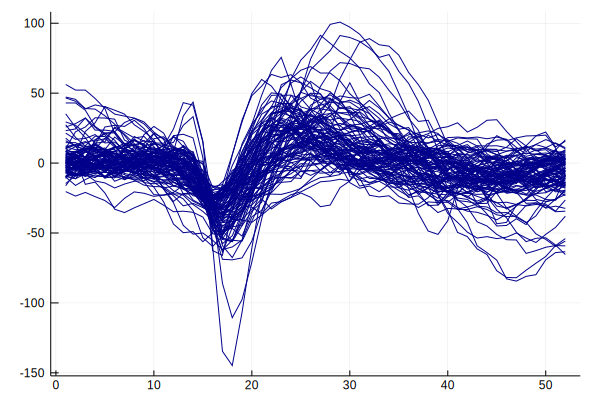

In [1]:
using Revise, FileIO, Plots
spike = load("spike.jld","spike")
plot(spike,color=:darkblue,legend=:none)

# Simulate Spike Data

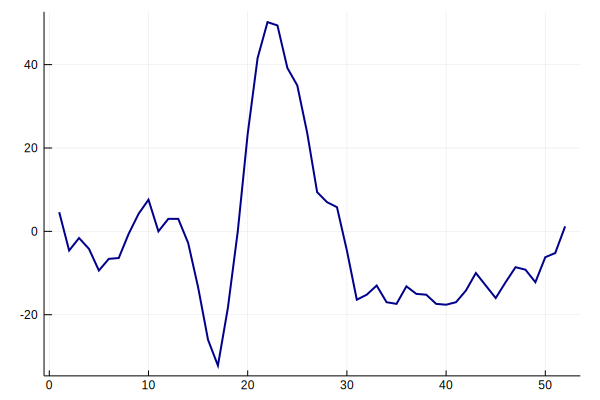

In [4]:
using SpikeSorting
s = spike[:,2]
plot(s,color=:darkblue,legend=:none,linewidth=2)

## Fit Spike Shape Model

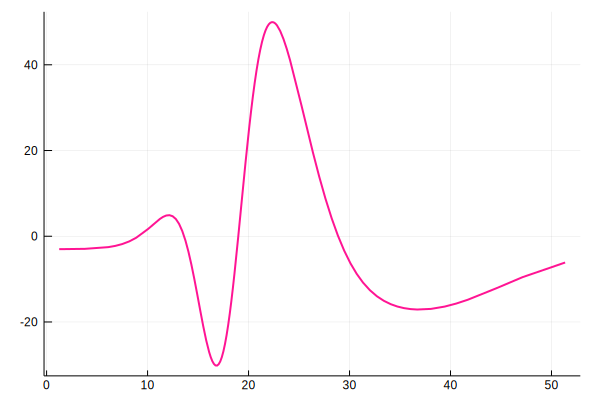

In [5]:
using LsqFit
init = Float64[-20,15,40, 40,25,50, 15,4,50, -40,40,70, 0]
#init = rand(spikeshapeparamn)*maximum(abs.(s))
shapefit = curve_fit((x,p)->spikeshape.(x,p...),collect(1:1.0:length(s)),s,init,maxIter=10000)
plot(x->spikeshape.(x,shapefit.param...),1,length(s),color=:deeppink,legend=:none,linewidth=2)

## Regenerate Spike from Spike Shape Model

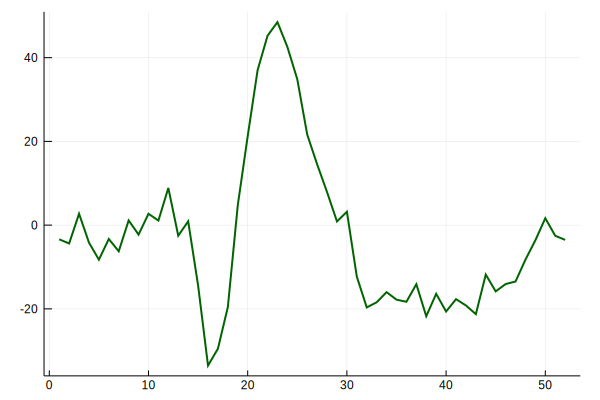

In [6]:
plot(1:length(s),spikeshape(1:length(s),shapefit.param...,snr=5),color=:darkgreen,legend=:none,linewidth=2)

## Simulate Unit Spikes

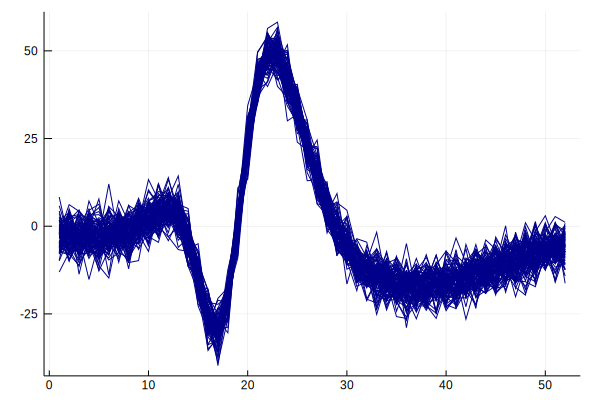

In [7]:
simspike = hcat((spikeshape(1:length(s),shapefit.param...,snr=5) for _ in 1:size(spike,2))...)
plot(simspike,color=:darkblue,legend=:none)

## Save Spike Shape Model

In [9]:
using CSV,DataFrames
CSV.write("spikeshapes.csv",DataFrame(shapefit.param'),append=true);